## Compared DCA and Lumpsum strategies for Investing

### Permasalahan

Investasi di aset kripto sering kali melibatkan volatilitas harga yang tinggi, sehingga sering kali kita sulit untuk menentukan harga optimal untuk pembelian aset tersebut agar mendapatkan return yang maksimal. 
Dua pendekatan umum yang digunakan investor dalam melakukan pembelian aset adalah:
1. Lumpsum, yaitu membeli aset dalam jumlah besar sekaligus di awal.
2. Dollar Cost Averaging (DCA), yaitu membagi pembelian menjadi jumlah yang lebih kecil dan dilakukan secara berkala (misalnya bulanan), tanpa mempertimbangkan harga saat itu.

Namun, tidak selalu jelas strategi mana yang lebih optimal dalam jangka waktu tertentu, terutama pada aset dengan volatilitas tinggi seperti kripto.

### Tujuan 

Tujuan dari proyek ini adalah untuk membandingkan strategi DCA dan Lumpsum dalam periode yang sama, dengan menggunakan contoh aset crypto ADA (Cardano). Performa strategi tersebut akan membandingkan :
1. Jumlah Aset Terkumpul
2. Nilai Portofolio Akhir
3. Return on Investment

### Tahapan Proyek
1. Mengambil data historis
2. Preprocessing Data
3. Simulasi strategi
4. Visualisasi 
5. Analisis dan Insight

**Mengambil Data historis**

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import requests

In [41]:
def fetch_price_history(coin_id, vs_currency='usd', days=365):
    url = f'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'
    params = {
        'vs_currency': vs_currency,
        'days': days,
        'interval': 'daily'
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        raise Exception(f"API error: {response.status_code}, {response.text}")
    
    data = response.json()
    
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    df = df[['date', 'price']]
    
    return df

In [42]:
ada_df = fetch_price_history('cardano', 'usd', days=365)  # data 2 tahun
ada_df

,date,price
0,2024-04-22 00:00:00,0.499100
1,2024-04-23 00:00:00,0.516369
2,2024-04-24 00:00:00,0.500444
3,2024-04-25 00:00:00,0.474899
4,2024-04-26 00:00:00,0.470579
...,...,...
361,2025-04-18 00:00:00,0.616895
362,2025-04-19 00:00:00,0.627304
363,2025-04-20 00:00:00,0.628085
364,2025-04-21 00:00:00,0.620209


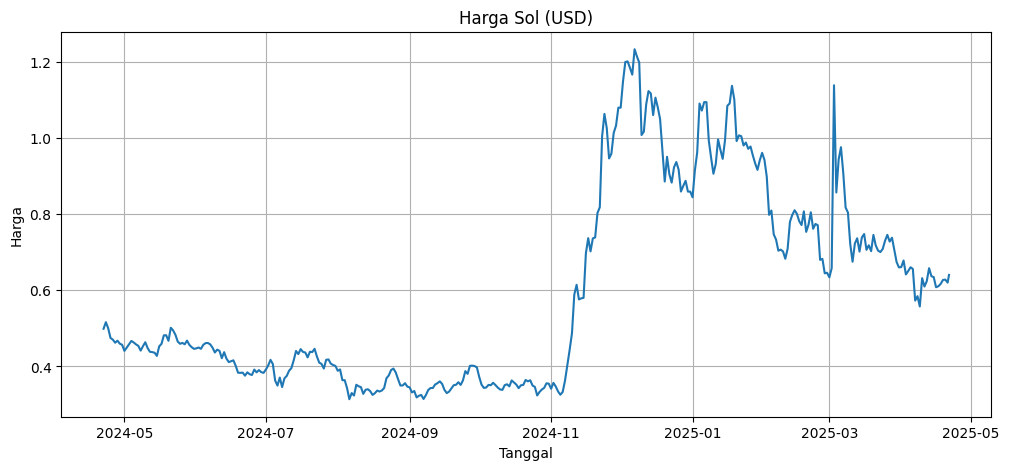

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(ada_df['date'], ada_df['price'])
plt.title("Harga Sol (USD)")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.grid(True)
plt.show()

Aset kripto (ADA) memiliki harga yang cenderung volatil, dari grafik tahunan tersebut susah untuk memprediksi market bearish atau bulish dan dimana kita harus entry position 

**Data Preprocessing**

In [56]:
ada_df.isnull().sum()

date     0
price    0
dtype: int64

**Simulasi Strategi**

strategi investasi yang dilakukan yakni dengan modal investasi awal 1200 dolar. 
1. Lumpsum; 1200 dolar tersebut akan langsung di entry di awal harga
2. DCA ; 1200 dolar akan dibagi menjadi 12 bulan pembelian, dimana 1 bulan di tanggal awal bulan membeli sebanyak 100 dolar

Lumpsum

In [44]:
total_investasi = 1200

In [45]:
first_price = ada_df.iloc[0]['price']
lumpsum_coins = total_investasi / first_price
lumpsum_value = lumpsum_coins * ada_df.iloc[-1]['price']

lumpsum_value

1539.8448598989335

Nilai portofolio di awal akan naik menjadi 1539.84 dolar

In [46]:
lumpsum_coins

2404.325669578239

Dengan aset coin yang didapat sebanyak 2404.33 coin

DCA

In [48]:
monthly_investment = total_investasi/12
sol_df_monthly = ada_df.copy()
sol_df_monthly["month"]= sol_df_monthly['date'].dt.to_period('M')



# pembelian setiap awal tanggal
monthly_df = sol_df_monthly.groupby('month').first().reset_index()
dca_coins = (monthly_investment / monthly_df.iloc[:12]['price']).sum()
dca_value = dca_coins * sol_df_monthly.iloc[-1]['price']

dca_value

1593.8408514746338

Nilai portofolio akhir dengan menggunakan teknik DCA sebesar USD 1593.84

In [49]:
monthly_df["dca_coins"] = (monthly_investment / monthly_df.iloc[:12]['price']).cumsum()

In [50]:
monthly_df.at[monthly_df.index[12], 'dca_coins'] = monthly_df.at[monthly_df.index[11], 'dca_coins']

In [51]:
monthly_df

,month,date,price,dca_coins
0,2024-04,2024-04-22,0.499100,200.360472
1,2024-05,2024-05-01,0.440954,427.141420
2,2024-06,2024-06-01,0.447536,650.587337
3,2024-07,2024-07-01,0.392040,905.663469
4,2024-08,2024-08-01,0.388714,1162.922101
5,2024-09,2024-09-01,0.345142,1452.658047
6,2024-10,2024-10-01,0.372657,1721.001626
7,2024-11,2024-11-01,0.341602,2013.739875
8,2024-12,2024-12-01,1.079440,2106.380487
9,2025-01,2025-01-01,0.844261,2224.827268


Banyak aset yang didapat dengan menggunakan teknik DCA sebanyak 2488.64 coin

**Visualisasi**

In [52]:
df_dca = ada_df.copy()
merged_df = pd.merge_asof(df_dca, monthly_df[['date', 'dca_coins']], on='date')
merged_df["dca_value"] = merged_df["price"] * merged_df["dca_coins"]

In [53]:
merged_df

,date,price,dca_coins,dca_value
0,2024-04-22 00:00:00,0.499100,200.360472,100.000000
1,2024-04-23 00:00:00,0.516369,200.360472,103.460026
2,2024-04-24 00:00:00,0.500444,200.360472,100.269295
3,2024-04-25 00:00:00,0.474899,200.360472,95.150980
4,2024-04-26 00:00:00,0.470579,200.360472,94.285397
...,...,...,...,...
361,2025-04-18 00:00:00,0.616895,2488.635428,1535.226793
362,2025-04-19 00:00:00,0.627304,2488.635428,1561.131903
363,2025-04-20 00:00:00,0.628085,2488.635428,1563.075324
364,2025-04-21 00:00:00,0.620209,2488.635428,1543.473526


In [54]:
portofolio_growth = ada_df.copy()
portofolio_growth['lumpsum_value'] = lumpsum_coins * portofolio_growth['price']
portofolio_growth['dca_value'] = merged_df["dca_value"]
portofolio_growth


,date,price,lumpsum_value,dca_value
0,2024-04-22 00:00:00,0.499100,1200.000000,100.000000
1,2024-04-23 00:00:00,0.516369,1241.520317,103.460026
2,2024-04-24 00:00:00,0.500444,1203.231538,100.269295
3,2024-04-25 00:00:00,0.474899,1141.811759,95.150980
4,2024-04-26 00:00:00,0.470579,1131.424762,94.285397
...,...,...,...,...
361,2025-04-18 00:00:00,0.616895,1483.216523,1535.226793
362,2025-04-19 00:00:00,0.627304,1508.244022,1561.131903
363,2025-04-20 00:00:00,0.628085,1510.121604,1563.075324
364,2025-04-21 00:00:00,0.620209,1491.183874,1543.473526


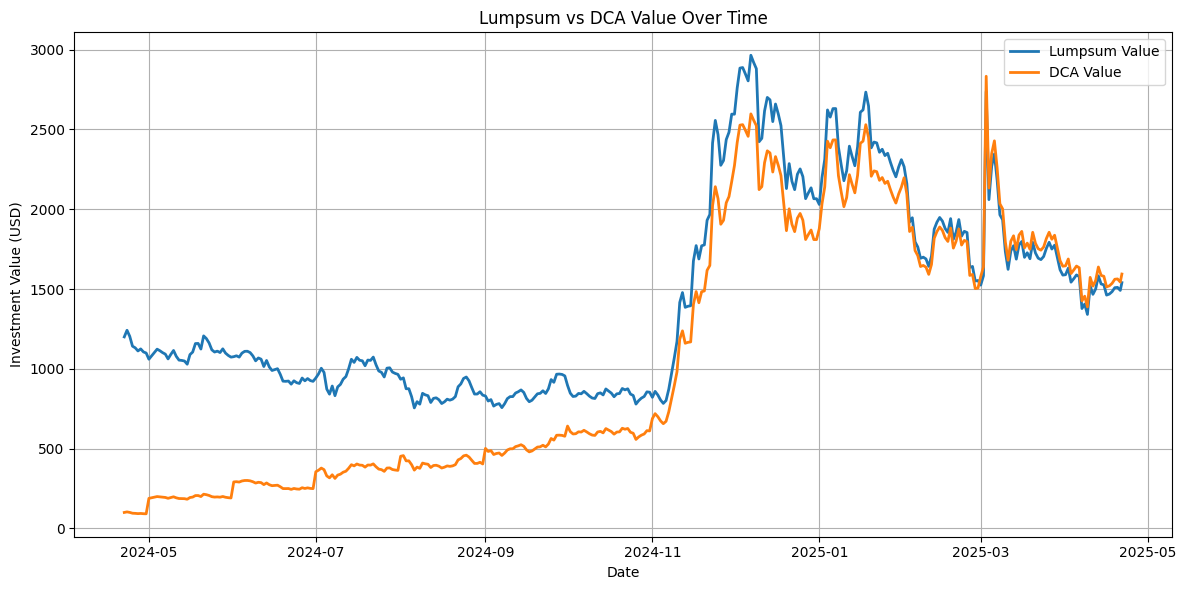

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(portofolio_growth['date'], portofolio_growth['lumpsum_value'], label='Lumpsum Value', linewidth=2)
plt.plot(portofolio_growth['date'], portofolio_growth['dca_value'], label='DCA Value', linewidth=2)
plt.title('Lumpsum vs DCA Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Dari grafik tersebut dapat diketahui bahwa pertumbuhan portofolio untuk teknik DCA lebih tinggi, dan cenderung naik di awal daripada Lumpsum, di akhir periode teknik DCA menghasilkan return yang lebih tinggi

**Analisis dan Insight**

Jika dibandingkan antara DCA dan Lumpsum, DCA menghasilkan return yang lebih baik.
1. Nilai porotofio akhir yang lebih tinggi yakni sebesar USD 1593.84 
2. Total aset (ADA) yang juga lebih besar yaitu sebanyak 2488.64 coin

In [60]:
roi_lumpsum = (( lumpsum_value - total_investasi) / total_investasi) * 100
roi_DCA = (( dca_value - total_investasi) / total_investasi) * 100

print (f"nilai ROI strategi lumpsum : {roi_lumpsum:.2f}%" )
print (f"nilai ROI strategi DCA :  {roi_DCA:.2f}%")

nilai ROI strategi lumpsum : 28.32%
nilai ROI strategi DCA :  32.82%


Retrun on Invesment (ROI) strategi DCA lebih tinggi yakni 32.82%, sehingga DCA lebih baik . Namun ada sesuatu yang perlu diperhatikan :

1. Meskipun cocok untuk pasar yang volatil, apabila tren pasar sedang bullish dalam periode waktu yang lama dan cepat seperti Halving Season maupun ALt Season, DCA memiliki potensi keuntungan yang rendah dan Lumpsum biasanya lebih baik
2. DCA membutuhkan waktu periodik untuk full invested, artinya modal kita ada yang menganggur karena pembelian berlangsung bertahap
3. Momentum yang didapat belum tentu maksimal terlebih jika pasar turun dan naik dengan cepat, tetapi setidaknya mengantisipasi pembelian di harga tinggi
4. Return yang didapat perlu mempertimbangkan biaya transaksi karena order berlangsung bertahap
5. DCA juga membutuhkan konsistensi tiap periode pembelian

Dengan kelemahan tersebut namun DCA konsisten dan disiplin dalam investasi jangka panjang, "Nobody's timing the market" tidak ada yang mampu entry di posisi ideal DCA menjadi opsi yang baik, keuntungan lain tentu mengurangi stress saat pasar fluktuatif

Terimakasih
- credit (alayganteng2025)